In [3]:
%matplotlib inline

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
def Test(image):
    # Original Hough
    padded = cv2.copyMakeBorder(image, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 = 60, param2 = 40, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    One = cv2.bitwise_and(image, image, mask=mask)
    
    #Otsu Threshold
    ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    padded = cv2.copyMakeBorder(th2, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 =30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Two = cv2.bitwise_and(image, image, mask=mask)
 
    #Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(image,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    padded = cv2.copyMakeBorder(th3, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 =30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Three = cv2.bitwise_and(image, image, mask=mask)
    
    #Global Thresholding (v = 127)
    img = cv2.medianBlur(image,5)

    ret,t1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    t2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    t3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    padded = cv2.copyMakeBorder(t1, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 = 30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Four = cv2.bitwise_and(image, image, mask=mask)

    #Adaptive Mean Thresholding
    padded = cv2.copyMakeBorder(th2, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 = 30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Five = cv2.bitwise_and(image, image, mask=mask)

    #Adaptive Gaussian Thresholding
    padded = cv2.copyMakeBorder(t3, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 = 30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Six = cv2.bitwise_and(image, image, mask=mask)
    
    Seven = np.zeros(image.shape, np.uint8)
    #imgs = [One, Two, Three, Four, Five, Six]
    #titles = ['Hough', 'Otsu', 'Otsu Blur', 'Global Threshold','Adaptive Mean', 'Adaptive Gaussian']
    #for i in xrange(6):
    #        plt.subplot(2,3,i+1), plt.imshow(imgs[i])
    #        plt.title(titles[i])
    #        plt.xticks([]), plt.yticks([])
    #        plt.show()
    return [image, One, Two, Three, Four, Five, Six, Seven]

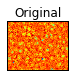

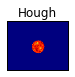

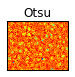

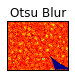

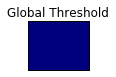

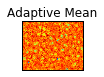

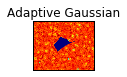

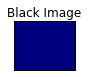

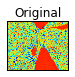

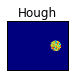

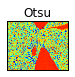

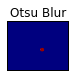

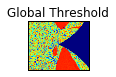

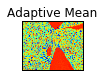

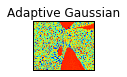

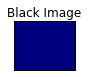

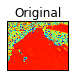

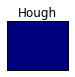

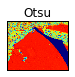

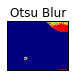

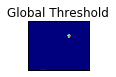

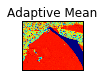

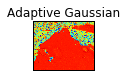

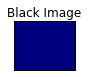

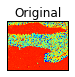

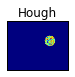

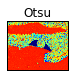

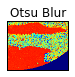

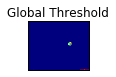

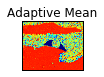

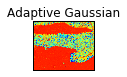

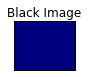

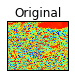

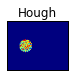

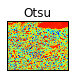

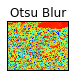

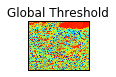

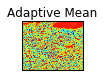

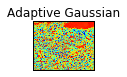

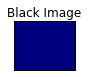

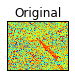

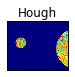

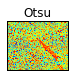

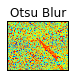

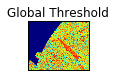

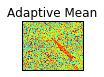

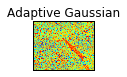

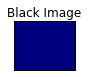

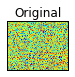

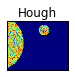

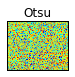

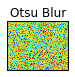

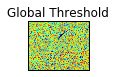

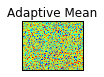

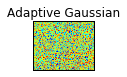

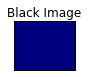

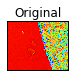

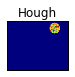

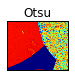

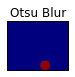

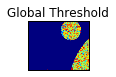

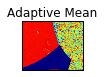

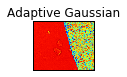

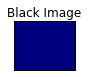

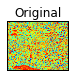

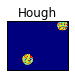

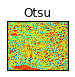

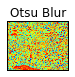

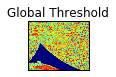

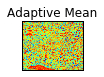

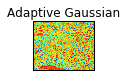

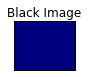

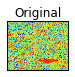

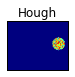

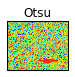

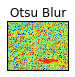

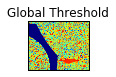

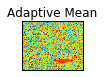

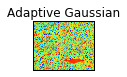

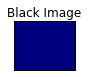

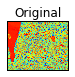

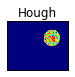

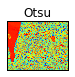

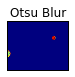

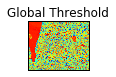

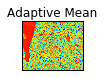

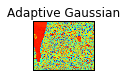

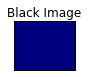

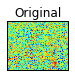

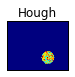

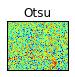

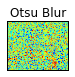

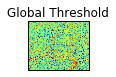

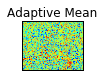

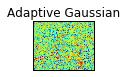

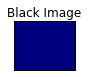

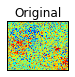

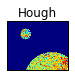

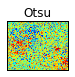

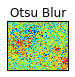

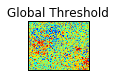

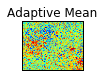

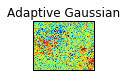

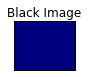

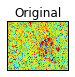

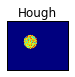

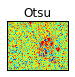

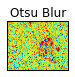

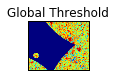

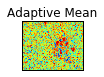

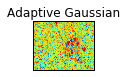

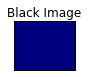

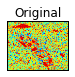

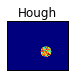

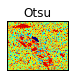

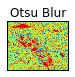

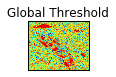

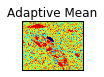

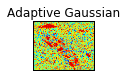

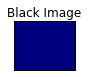

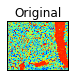

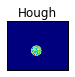

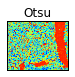

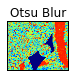

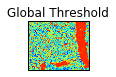

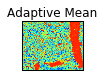

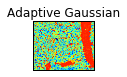

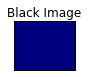

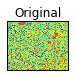

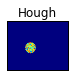

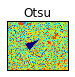

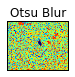

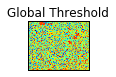

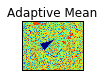

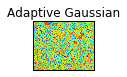

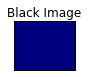

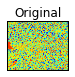

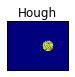

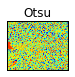

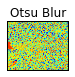

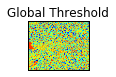

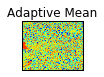

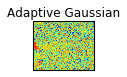

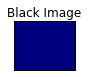

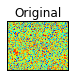

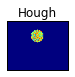

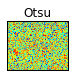

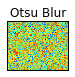

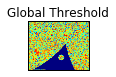

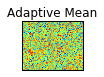

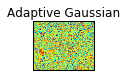

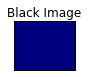

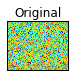

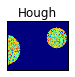

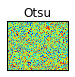

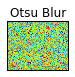

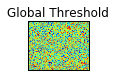

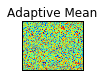

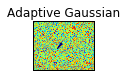

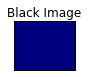

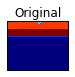

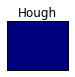

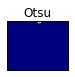

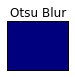

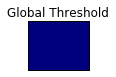

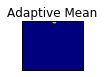

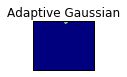

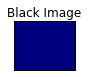

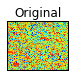

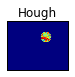

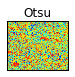

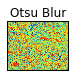

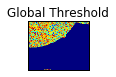

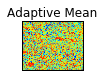

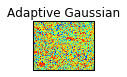

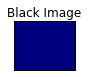

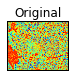

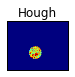

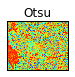

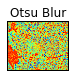

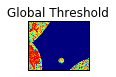

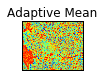

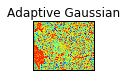

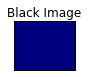

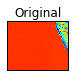

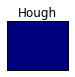

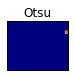

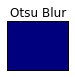

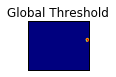

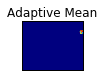

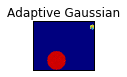

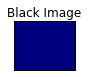

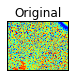

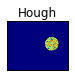

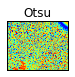

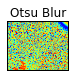

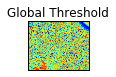

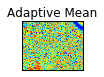

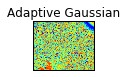

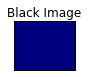

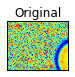

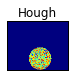

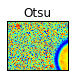

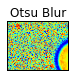

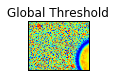

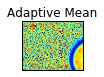

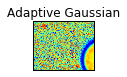

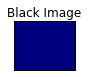

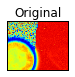

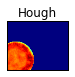

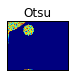

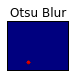

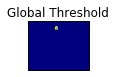

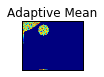

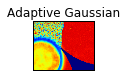

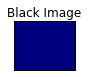

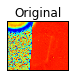

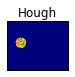

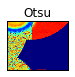

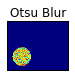

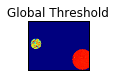

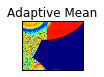

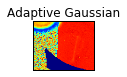

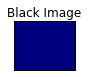

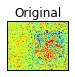

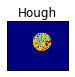

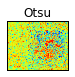

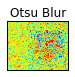

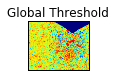

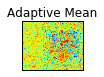

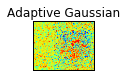

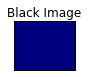

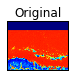

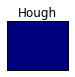

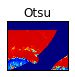

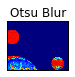

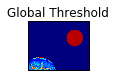

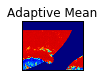

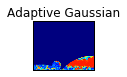

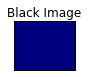

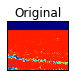

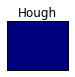

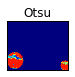

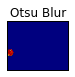

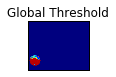

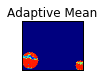

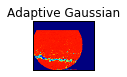

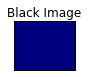

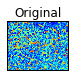

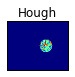

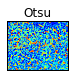

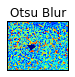

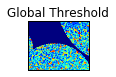

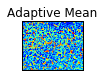

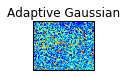

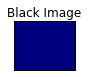

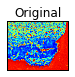

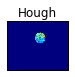

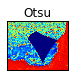

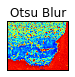

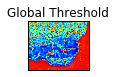

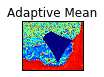

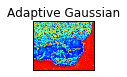

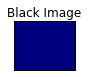

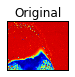

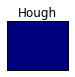

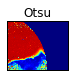

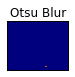

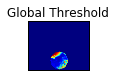

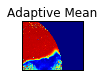

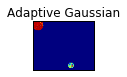

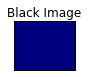

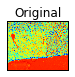

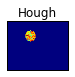

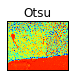

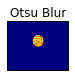

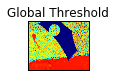

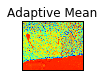

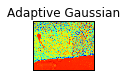

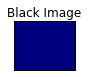

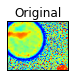

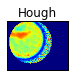

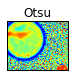

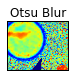

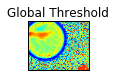

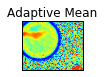

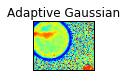

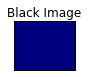

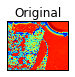

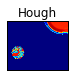

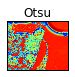

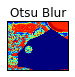

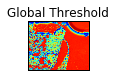

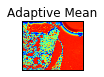

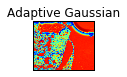

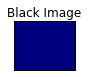

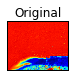

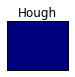

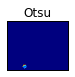

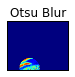

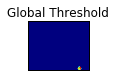

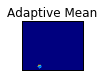

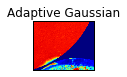

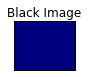

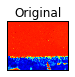

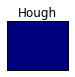

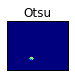

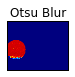

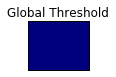

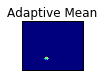

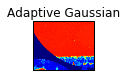

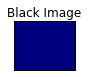

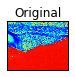

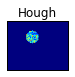

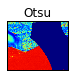

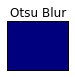

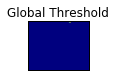

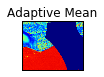

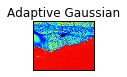

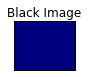

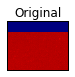

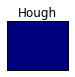

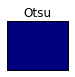

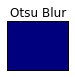

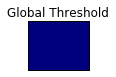

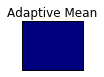

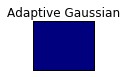

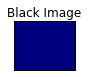

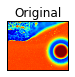

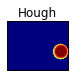

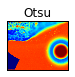

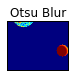

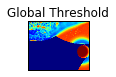

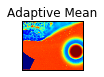

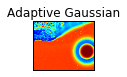

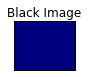

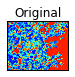

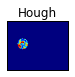

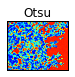

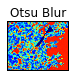

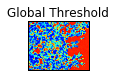

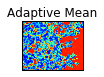

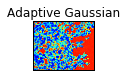

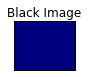

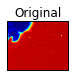

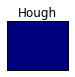

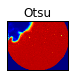

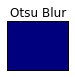

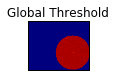

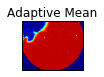

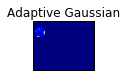

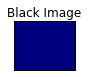

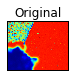

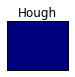

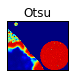

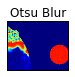

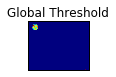

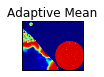

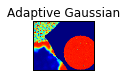

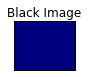

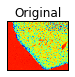

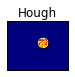

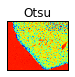

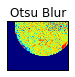

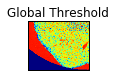

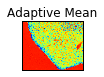

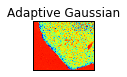

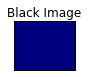

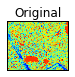

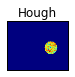

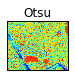

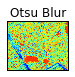

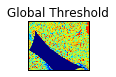

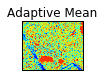

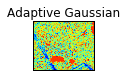

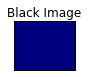

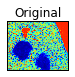

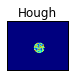

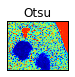

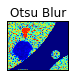

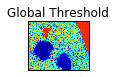

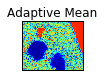

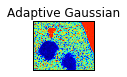

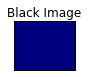

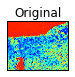

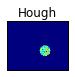

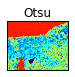

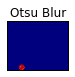

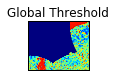

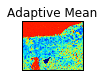

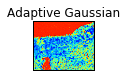

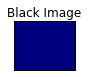

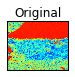

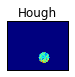

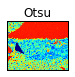

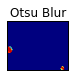

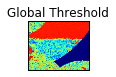

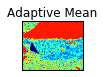

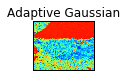

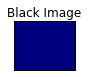

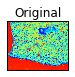

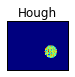

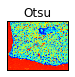

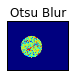

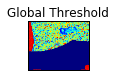

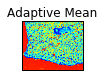

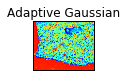

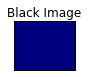

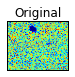

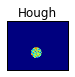

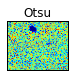

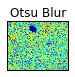

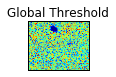

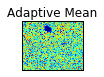

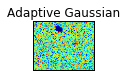

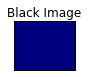

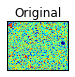

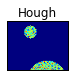

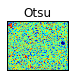

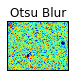

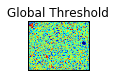

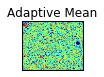

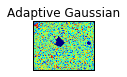

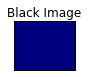

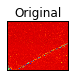

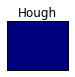

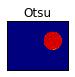

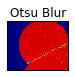

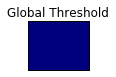

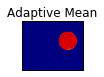

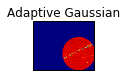

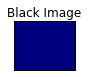

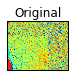

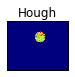

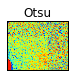

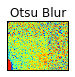

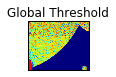

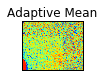

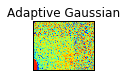

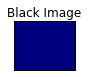

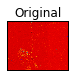

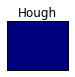

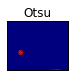

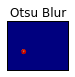

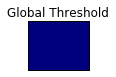

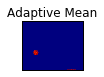

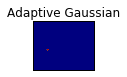

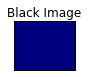

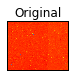

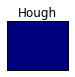

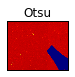

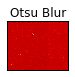

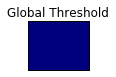

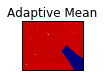

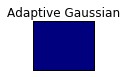

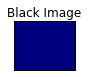

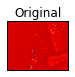

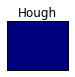

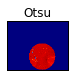

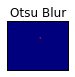

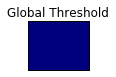

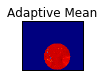

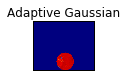

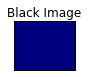

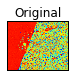

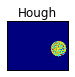

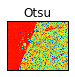

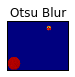

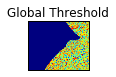

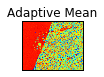

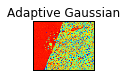

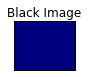

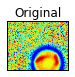

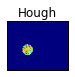

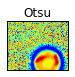

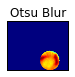

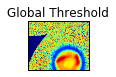

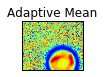

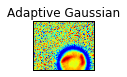

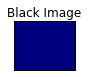

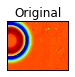

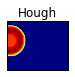

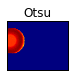

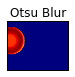

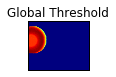

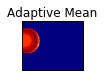

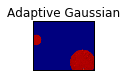

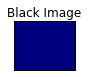

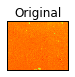

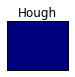

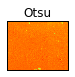

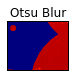

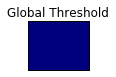

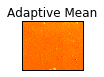

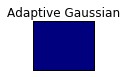

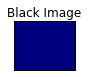

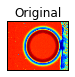

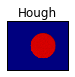

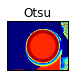

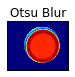

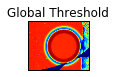

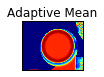

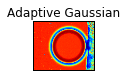

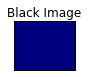

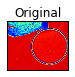

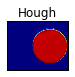

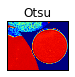

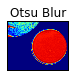

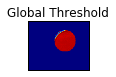

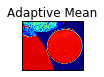

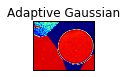

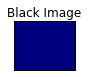

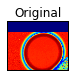

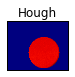

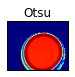

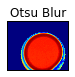

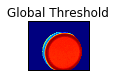

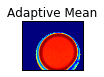

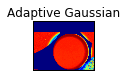

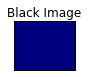

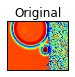

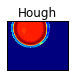

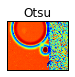

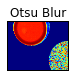

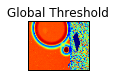

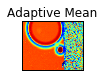

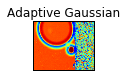

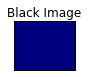

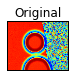

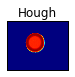

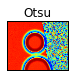

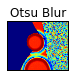

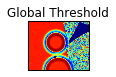

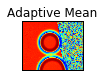

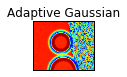

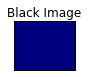

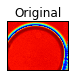

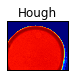

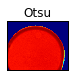

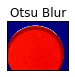

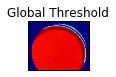

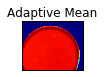

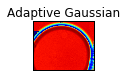

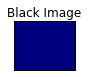

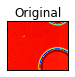

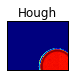

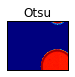

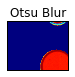

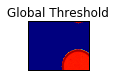

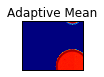

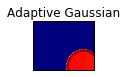

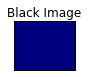

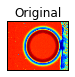

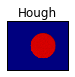

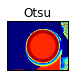

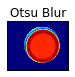

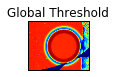

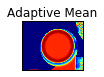

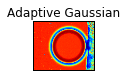

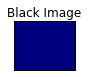

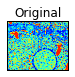

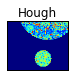

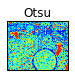

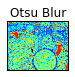

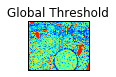

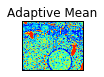

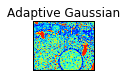

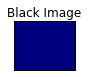

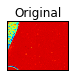

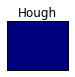

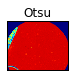

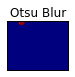

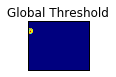

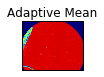

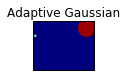

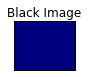

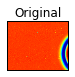

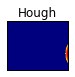

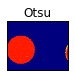

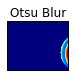

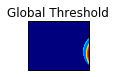

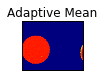

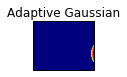

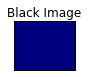

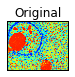

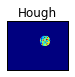

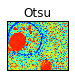

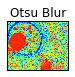

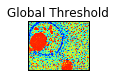

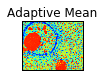

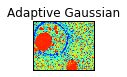

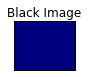

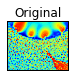

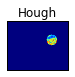

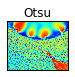

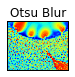

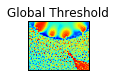

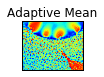

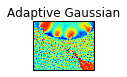

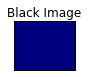

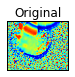

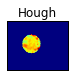

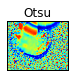

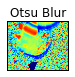

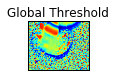

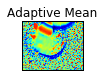

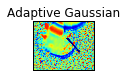

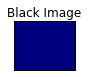

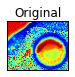

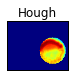

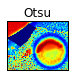

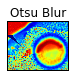

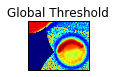

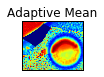

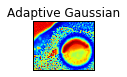

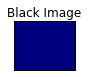

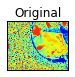

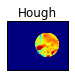

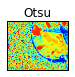

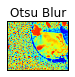

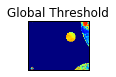

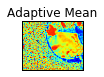

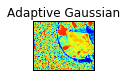

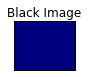

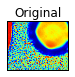

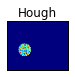

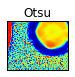

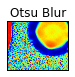

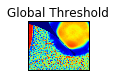

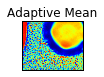

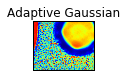

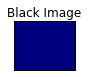

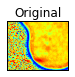

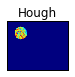

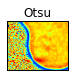

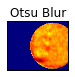

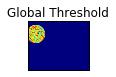

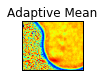

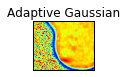

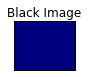

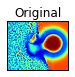

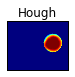

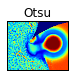

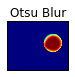

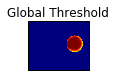

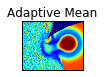

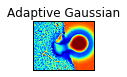

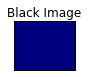

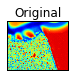

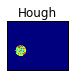

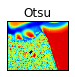

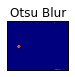

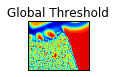

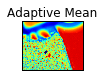

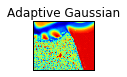

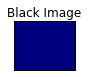

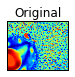

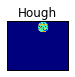

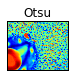

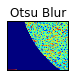

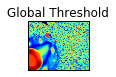

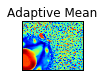

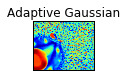

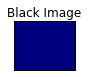

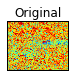

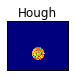

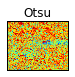

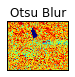

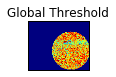

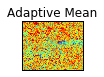

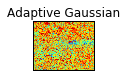

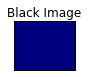

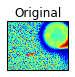

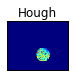

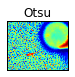

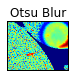

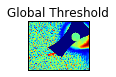

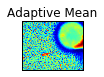

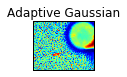

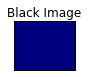

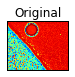

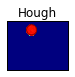

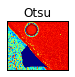

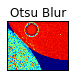

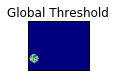

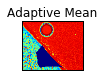

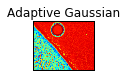

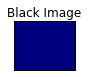

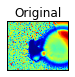

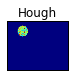

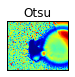

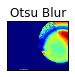

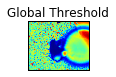

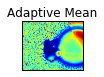

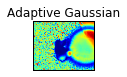

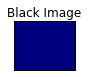

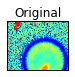

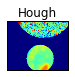

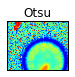

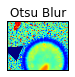

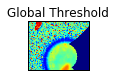

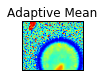

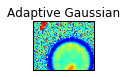

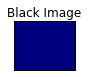

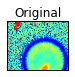

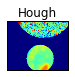

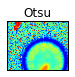

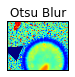

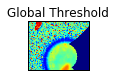

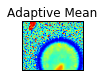

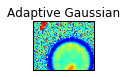

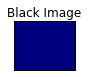

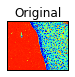

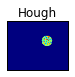

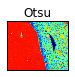

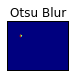

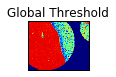

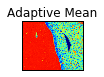

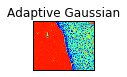

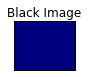

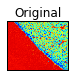

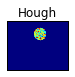

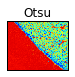

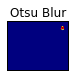

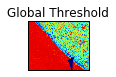

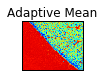

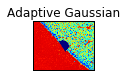

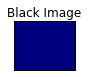

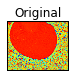

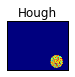

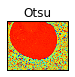

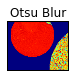

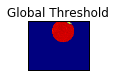

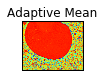

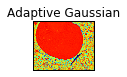

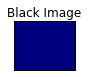

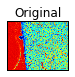

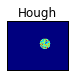

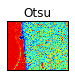

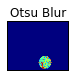

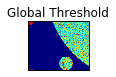

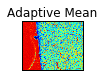

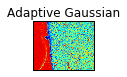

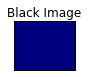

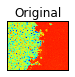

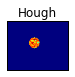

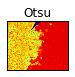

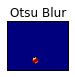

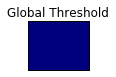

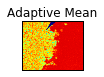

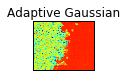

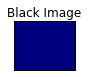

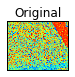

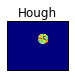

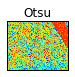

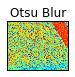

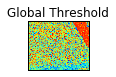

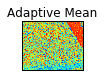

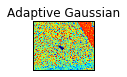

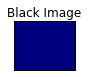

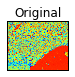

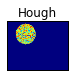

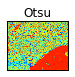

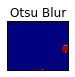

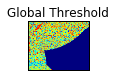

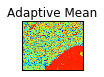

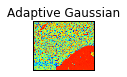

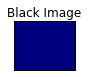

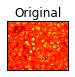

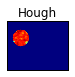

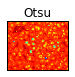

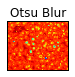

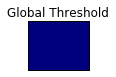

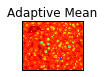

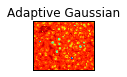

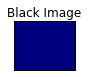

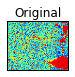

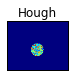

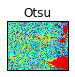

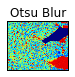

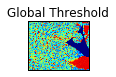

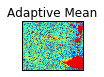

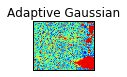

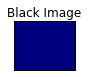

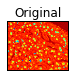

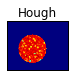

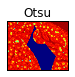

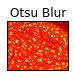

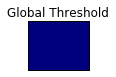

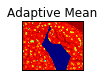

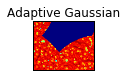

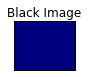

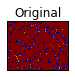

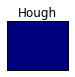

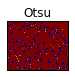

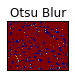

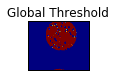

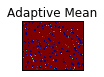

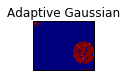

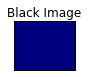

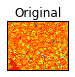

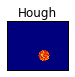

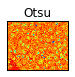

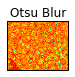

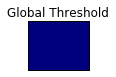

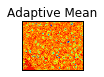

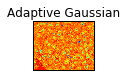

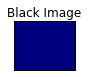

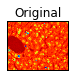

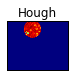

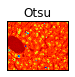

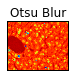

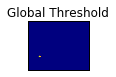

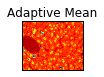

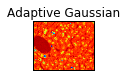

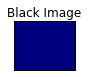

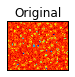

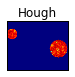

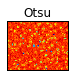

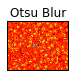

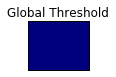

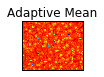

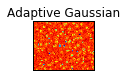

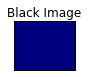

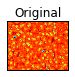

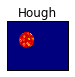

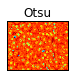

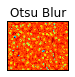

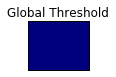

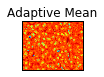

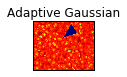

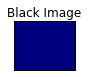

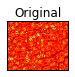

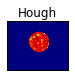

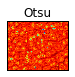

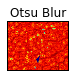

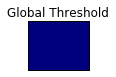

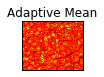

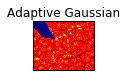

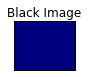

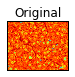

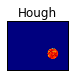

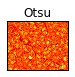

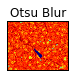

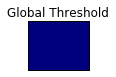

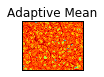

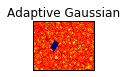

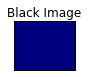

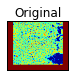

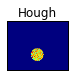

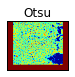

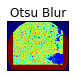

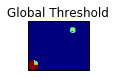

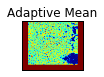

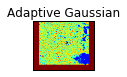

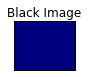

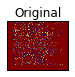

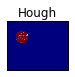

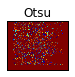

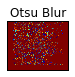

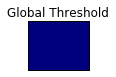

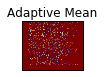

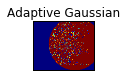

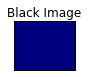

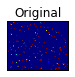

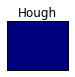

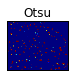

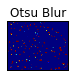

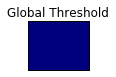

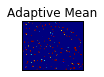

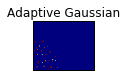

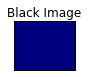

In [6]:
def main():
    file_name = os.listdir(".")

    for infile in file_name:
        if (infile[-4:] == ".tif"):
            img = cv2.imread(infile,0)
            crop = cv2.resize(img, (128,102))
            imgs = Test(crop)
            titles = ['Original', 'Hough', 'Otsu', 'Otsu Blur', 'Global Threshold','Adaptive Mean', 'Adaptive Gaussian', 'Black Image']
            for i in range(8):
                plt.subplot(4,2,i+1), plt.imshow(imgs[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
                plt.show()
main()

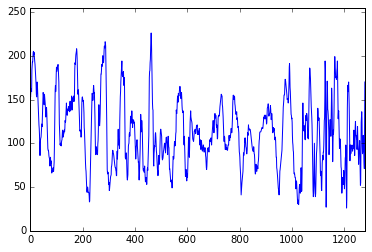

In [7]:
img = cv2.imread("Image47.tif",0)
mean = []
#fixed row
for i in range(img.shape[1]):
    mean.append(img[800,i])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[1],0,255])
plt.show()

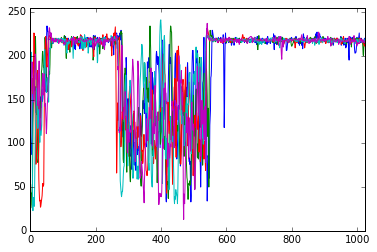

In [8]:
img = cv2.imread("GImage (12).tif",0)
mean = []
m1 = []
m2 = []
m3 = []
m4 = []
#fixed column
for i in range(img.shape[0]):
    mean.append(img[i,600])
    m1.append(img[i,590])
    m2.append(img[i,570])
    m3.append(img[i,550])
    m4.append(img[i,530])
    #print(img[i,500])
    #mean += img[i,500]

#print mean/ img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[0],0,255])
plt.plot(m1)
plt.axis([0,img.shape[0],0,255])
plt.plot(m2)
plt.axis([0,img.shape[0],0,255])
plt.plot(m3)
plt.axis([0,img.shape[0],0,255])
plt.plot(m4)
plt.axis([0,img.shape[0],0,255])
plt.show()

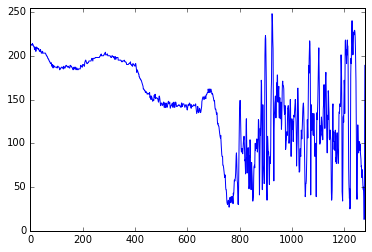

In [9]:
img = cv2.imread("Image (20).tif",0)
mean = []
#fixed row
for i in range(img.shape[1]):
    mean.append(img[300,i])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[1],0,255])
plt.show()

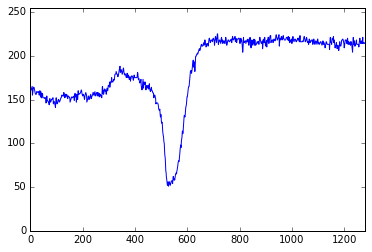

In [10]:
img = cv2.imread("Image (12).tif",0)
mean = []
#fixed row
for i in range(img.shape[1]):
    mean.append(img[1000,i])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[1],0,255])
plt.show()

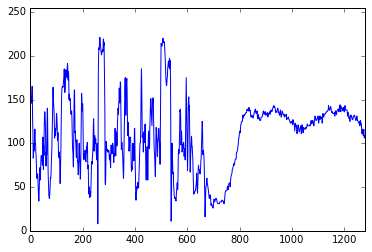

In [11]:
img = cv2.imread("Image61.tif",0)
mean = []
#fixed row
for i in range(img.shape[1]):
    mean.append(img[200,i])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[1],0,255])
plt.show()

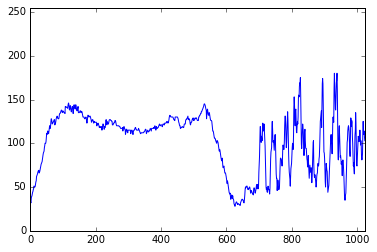

In [12]:
img = cv2.imread("Image61.tif",0)
mean = []
#fixed column
for i in range(img.shape[0]):
    mean.append(img[i,1000])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[0],0,255])
plt.show()

In [13]:
L = len(mean)
D = sparse.csc_matrix(np.diff(np.eye(L), 2))
w = np.ones(L)
for i in xrange(10):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + 1 * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = 1 * (y > z) + (1-1) * (y < z)
    
print z

NameError: name 'sparse' is not defined

In [ ]:
img = cv2.imread("Image62.tif",0)
mean = []
#fixed row
for i in range(img.shape[1]):
    mean.append(img[200,i])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[1],0,255])
plt.show()

In [ ]:
img = cv2.imread("Image62.tif",0)
mean = []
#fixed column
for i in range(img.shape[0]):
    mean.append(img[i,500])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[0],0,255])
plt.show()

In [ ]:
img = cv2.imread("Image63.tif",0)
mean = []
#fixed row
for i in range(img.shape[1]):
    mean.append(img[600,i])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[1],0,255])
plt.show()

In [ ]:
img = cv2.imread("Image63.tif",0)
mean = []
#fixed column
for i in range(img.shape[0]):
    mean.append(img[i,1100])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[0],0,255])
plt.show()

In [ ]:
img = cv2.imread("Image64.tif",0)
mean = []
#fixed row
for i in range(img.shape[1]):
    mean.append(img[800,i])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[1],0,255])
plt.show()

In [ ]:
img = cv2.imread("Image64.tif",0)
mean = []
#fixed column
for i in range(img.shape[0]):
    mean.append(img[i,800])
    #print(img[300,i])
    #mean += img[300,i]
    
#print mean/img.shape[0]

plt.plot(mean)
plt.axis([0,img.shape[0],0,255])
plt.show()

In [ ]:
im = cv2.Canny(img, 150, 180)

plt.imshow(im)
plt.show()

In [ ]:
img=cv2.imread("Image (12).tif",0)
im = cv2.Canny(img, 50, 180)

plt.imshow(im)
plt.show()

In [ ]:
img = cv2.imread("Image (26).tif", 0)
contours, hierarchy = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
out = np.zeros_like(img)
cv2.drawContours(out, contours, -1, (255,255,0), 3)

cv2.imshow("Contour",out)
cv2.waitKey(0)

In [ ]:
img = cv2.imread("Image (26).tif")
plt.imshow(img)
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Image47.tif',0)
template = img[500:900, 900:1280]
img2 = img.copy()
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (255,0,0), 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [ ]:
img_rgb = cv2.imread('Image (26).tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[600:700, 850:975]

rows, cols = template.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2), 90,1)
N = cv2.getRotationMatrix2D((cols/2,rows/2), 180,1)
O = cv2.getRotationMatrix2D((cols/2,rows/2), 270,1)
W = cv2.getRotationMatrix2D((cols/2,rows/2), 45,1)
X = cv2.getRotationMatrix2D((cols/2,rows/2), 135,1)
Y = cv2.getRotationMatrix2D((cols/2,rows/2), 225,1)
Z = cv2.getRotationMatrix2D((cols/2,rows/2), 315,1)

P = cv2.warpAffine(template, M, (cols,rows))
Q = cv2.warpAffine(template, N, (cols,rows))
R = cv2.warpAffine(template, O, (cols,rows))
A = cv2.warpAffine(template, W, (cols,rows))
B = cv2.warpAffine(template, X, (cols,rows))
C = cv2.warpAffine(template, Y, (cols,rows))
D = cv2.warpAffine(template, Z, (cols,rows))

w, h = template.shape[::-1]

res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)
res5 = cv2.matchTemplate(img_gray,A,cv2.TM_CCOEFF_NORMED)
res6 = cv2.matchTemplate(img_gray,B,cv2.TM_CCOEFF_NORMED)
res7 = cv2.matchTemplate(img_gray,C,cv2.TM_CCOEFF_NORMED)
res8 = cv2.matchTemplate(img_gray,D,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()


threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image44.tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]


res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image43.tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]


res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image42.tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]


res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image46.tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image41.tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image (12).tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]


res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image (10).tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image47.tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image (11).tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]


res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image (13).tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]


res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image (21).tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]


res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [ ]:
img_rgb = cv2.imread('Image (30).tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res5 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res6 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res7 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res8 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()